In [2]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from tsdr import tsdr
from tsdr.testseries import sockshop

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## KS-test

0.076075 White noise c-orders_network_receive_packets
0.928437 White noise c-orders-db_network_transmit_bytes_total
0.000000 Trend increase c-catalogue_last_seen
0.664751 Noise autocorrection s-front-end_throughput
0.000000 Slight change c-user_memory_usage_bytes
0.000255 Autocorrect s-shipping_throughput
0.000000 Sudden increase c-orders_memory_usage_bytes
0.027628 Level shift up s-front-end_latency
0.000000 Level shift up c-user_memory_working_set_bytes
0.004627 Level shift down c-front-end_memory_usage_bytes
0.008703 Single spike s-user_latency
0.377731 Single spike s-orders_latency
0.513012 Single spike c-carts-db_memory_failures_total
0.046661 Transient level shift up s-front-end_latency
0.119763 Transient level shift up s-orders_latency02
0.986653 Multiple spikes c-catalogue_cpu_cfs_throttled_periods_total
0.000255 White noise -> Transient level shift down c-user_cpu_usage_seconds_total
0.000255 White noise -> Transient level shift down c-front-end_network_receive_packets_total
0

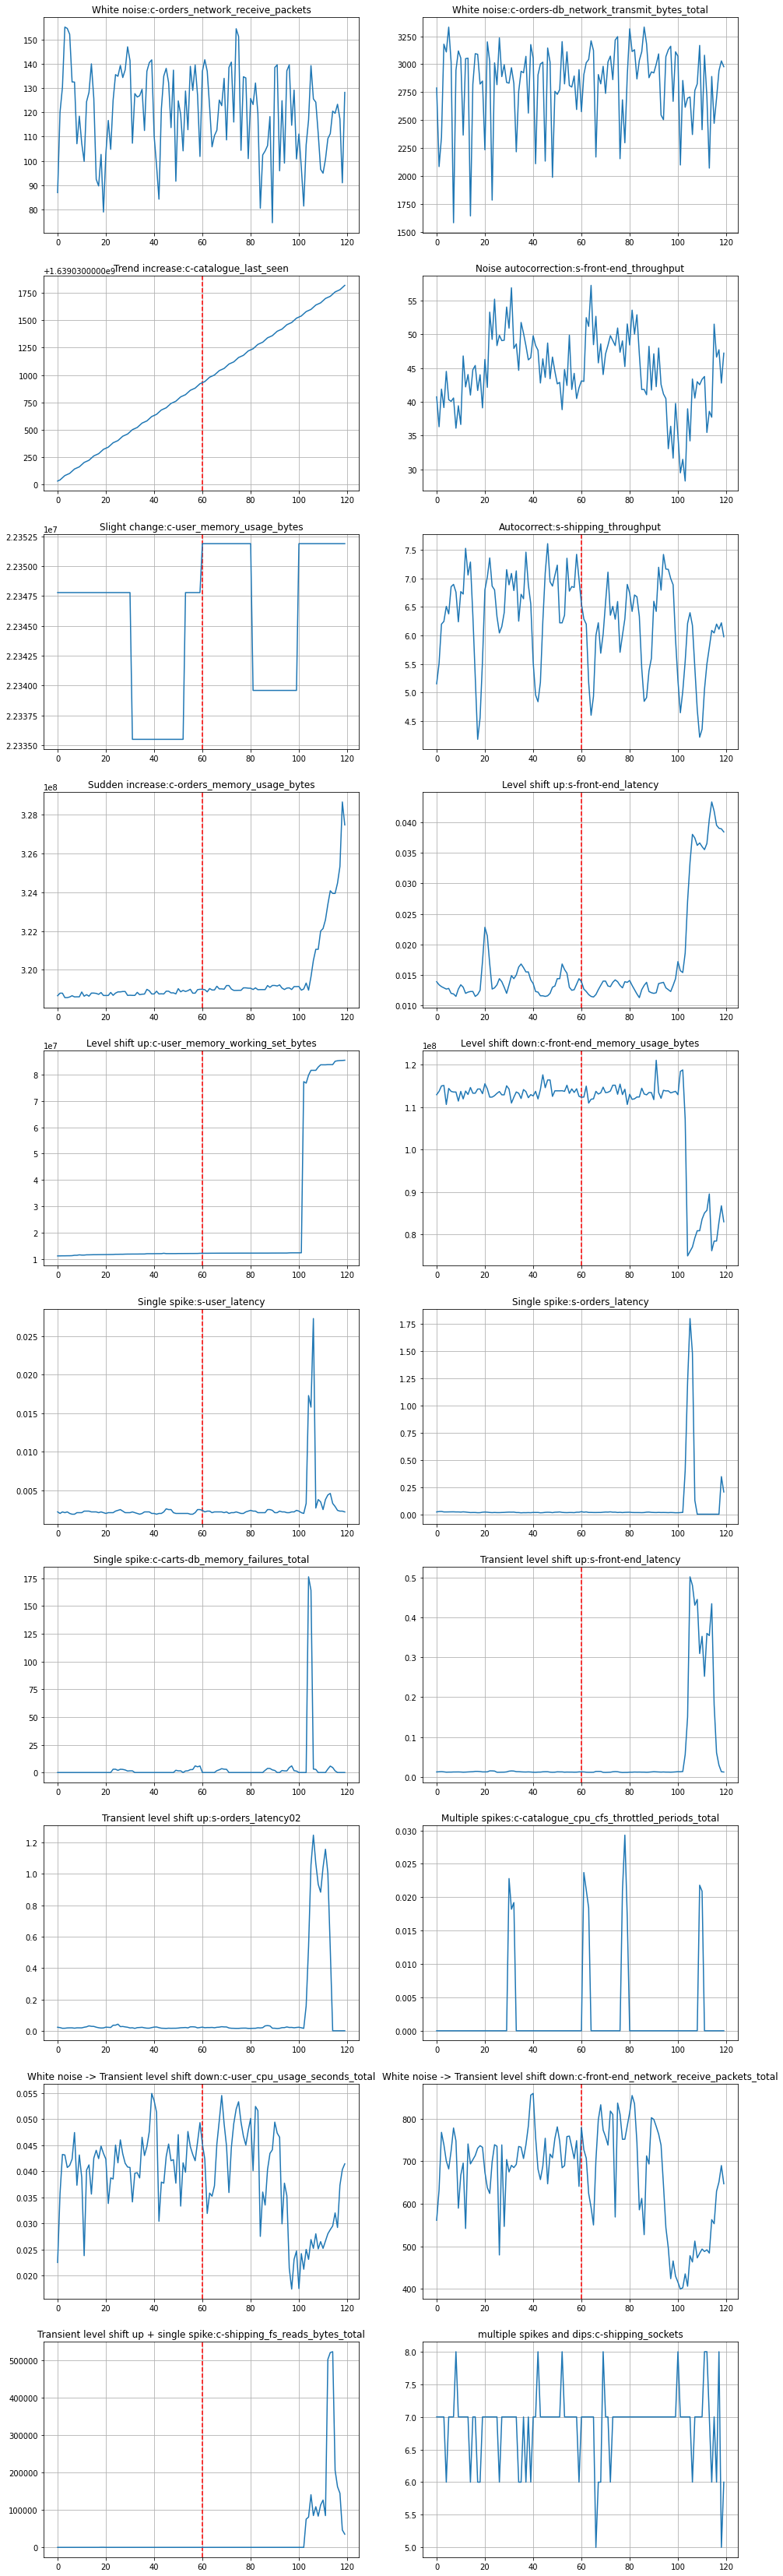

In [3]:
cases = sockshop.testcases_of_sockshop
fig, axs = plt.subplots(len(cases)//2, ncols=2)
fig.set_size_inches(16, 3*len(cases))
for case, ax in zip(cases, axs.flatten()):
    ts = np.array(case['datapoints'])
    train_ts, test_ts = np.split(ts, 2)

    pval = scipy.stats.ks_2samp(train_ts, test_ts).pvalue
    if pval <= 0.05:
        ax.axvline(train_ts.size, color='red', linestyle='dashed', label='breaks')
    print(f"{pval:5f}", case['pattern'], case['name'])

    ax.set_title(f"{case['pattern']}:{case['name']}")
    ax.plot(ts)
    ax.grid()

## Anderson-Darling test

0.183320 c-orders_network_receive_packets White noise
0.250000 c-orders-db_network_transmit_bytes_total White noise
0.001000 c-catalogue_last_seen Trend increase
0.250000 s-front-end_throughput Noise autocorrection
0.001000 c-user_memory_usage_bytes Slight change
0.001000 s-shipping_throughput Autocorrect
0.001000 c-orders_memory_usage_bytes Sudden increase
0.014585 s-front-end_latency Level shift up
0.001000 c-user_memory_working_set_bytes Level shift up
0.001000 c-front-end_memory_usage_bytes Level shift down
0.001000 s-user_latency Single spike
0.088424 s-orders_latency Single spike
0.161192 c-carts-db_memory_failures_total Single spike
0.016334 s-front-end_latency Transient level shift up
0.017914 s-orders_latency02 Transient level shift up
0.052513 c-catalogue_cpu_cfs_throttled_periods_total Multiple spikes
0.001000 c-user_cpu_usage_seconds_total White noise -> Transient level shift down
0.001000 c-front-end_network_receive_packets_total White noise -> Transient level shift down
0

/tmp/ipykernel_1374859/3384148351.py:8: UserWarning: p-value capped: true value larger than 0.25
  pval = scipy.stats.anderson_ksamp([train_ts, test_ts])[2]
/tmp/ipykernel_1374859/3384148351.py:8: UserWarning: p-value floored: true value smaller than 0.001
  pval = scipy.stats.anderson_ksamp([train_ts, test_ts])[2]
/tmp/ipykernel_1374859/3384148351.py:8: UserWarning: p-value capped: true value larger than 0.25
  pval = scipy.stats.anderson_ksamp([train_ts, test_ts])[2]
/tmp/ipykernel_1374859/3384148351.py:8: UserWarning: p-value floored: true value smaller than 0.001
  pval = scipy.stats.anderson_ksamp([train_ts, test_ts])[2]
/tmp/ipykernel_1374859/3384148351.py:8: UserWarning: p-value floored: true value smaller than 0.001
  pval = scipy.stats.anderson_ksamp([train_ts, test_ts])[2]
/tmp/ipykernel_1374859/3384148351.py:8: UserWarning: p-value floored: true value smaller than 0.001
  pval = scipy.stats.anderson_ksamp([train_ts, test_ts])[2]
/tmp/ipykernel_1374859/3384148351.py:8: UserWa

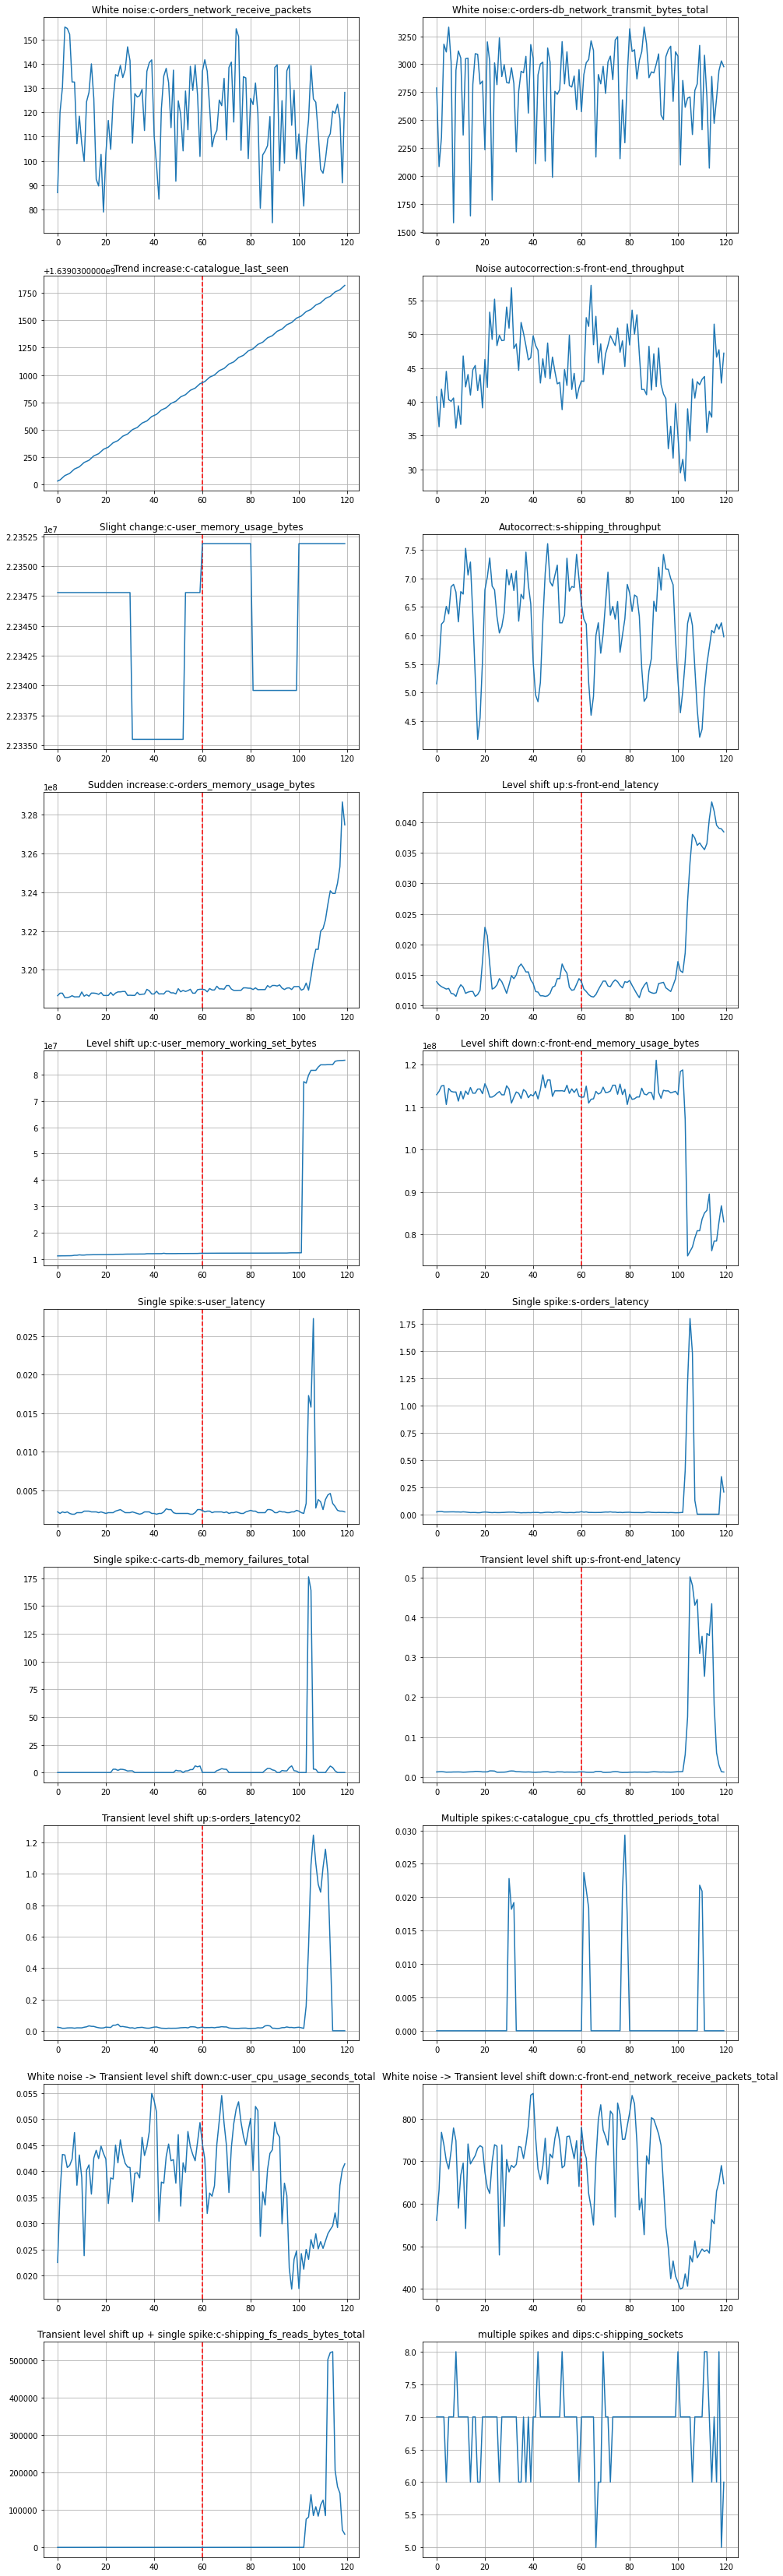

In [4]:
cases = sockshop.testcases_of_sockshop
fig, axs = plt.subplots(len(cases)//2, ncols=2)
fig.set_size_inches(16, 3*len(cases))
for case, ax in zip(cases, axs.flatten()):
    ts = np.array(case['datapoints'])
    train_ts, test_ts = np.split(ts, 2)

    pval = scipy.stats.anderson_ksamp([train_ts, test_ts])[2]
    if pval <= 0.05:
        ax.axvline(train_ts.size, color='red', linestyle='dashed', label='breaks')
    print(f"{pval:5f}", case['name'], case['pattern'])

    ax.set_title(f"{case['pattern']}:{case['name']}")
    ax.plot(ts)
    ax.grid()

## Epps-Singleton (ES) test 

0.485078 c-orders_network_receive_packets c-orders_network_receive_packets
0.184767 c-orders-db_network_transmit_bytes_total c-orders-db_network_transmit_bytes_total
0.000000 c-catalogue_last_seen c-catalogue_last_seen
0.105623 s-front-end_throughput s-front-end_throughput
0.000001 c-user_memory_usage_bytes c-user_memory_usage_bytes
0.001182 s-shipping_throughput s-shipping_throughput
0.000000 c-orders_memory_usage_bytes c-orders_memory_usage_bytes
0.944253 s-front-end_latency s-front-end_latency
0.000000 c-user_memory_working_set_bytes c-user_memory_working_set_bytes
0.001356 c-front-end_memory_usage_bytes c-front-end_memory_usage_bytes
0.000269 s-user_latency s-user_latency
0.000115 s-orders_latency s-orders_latency
0.470361 c-carts-db_memory_failures_total c-carts-db_memory_failures_total
0.002167 s-front-end_latency s-front-end_latency
0.012104 s-orders_latency02 s-orders_latency02


/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.9/site-packages/scipy/stats/_hypotests.py:128: UserWarning: Estimated covariance matrix does not have full rank. This indicates a bad choice of the input t and the test might not be consistent.
  warnings.warn('Estimated covariance matrix does not have full rank. '
/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.9/site-packages/scipy/stats/_hypotests.py:117: RuntimeWarning: divide by zero encountered in true_divide
  ts = np.reshape(t, (-1, 1)) / sigma
/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.9/site-packages/scipy/stats/_hypotests.py:120: RuntimeWarning: invalid value encountered in multiply
  gx = np.vstack((np.cos(ts*x), np.sin(ts*x))).T  # shape = (nx, 2*len(t))
/home/ubuntu/src/github.com/ai4sre/meltria-analyzer/.venv/lib/python3.9/site-packages/scipy/stats/_hypotests.py:120: RuntimeWarning: invalid value encountered in cos
  gx = np.vstack((np.cos(ts*x), np.sin(

LinAlgError: SVD did not converge

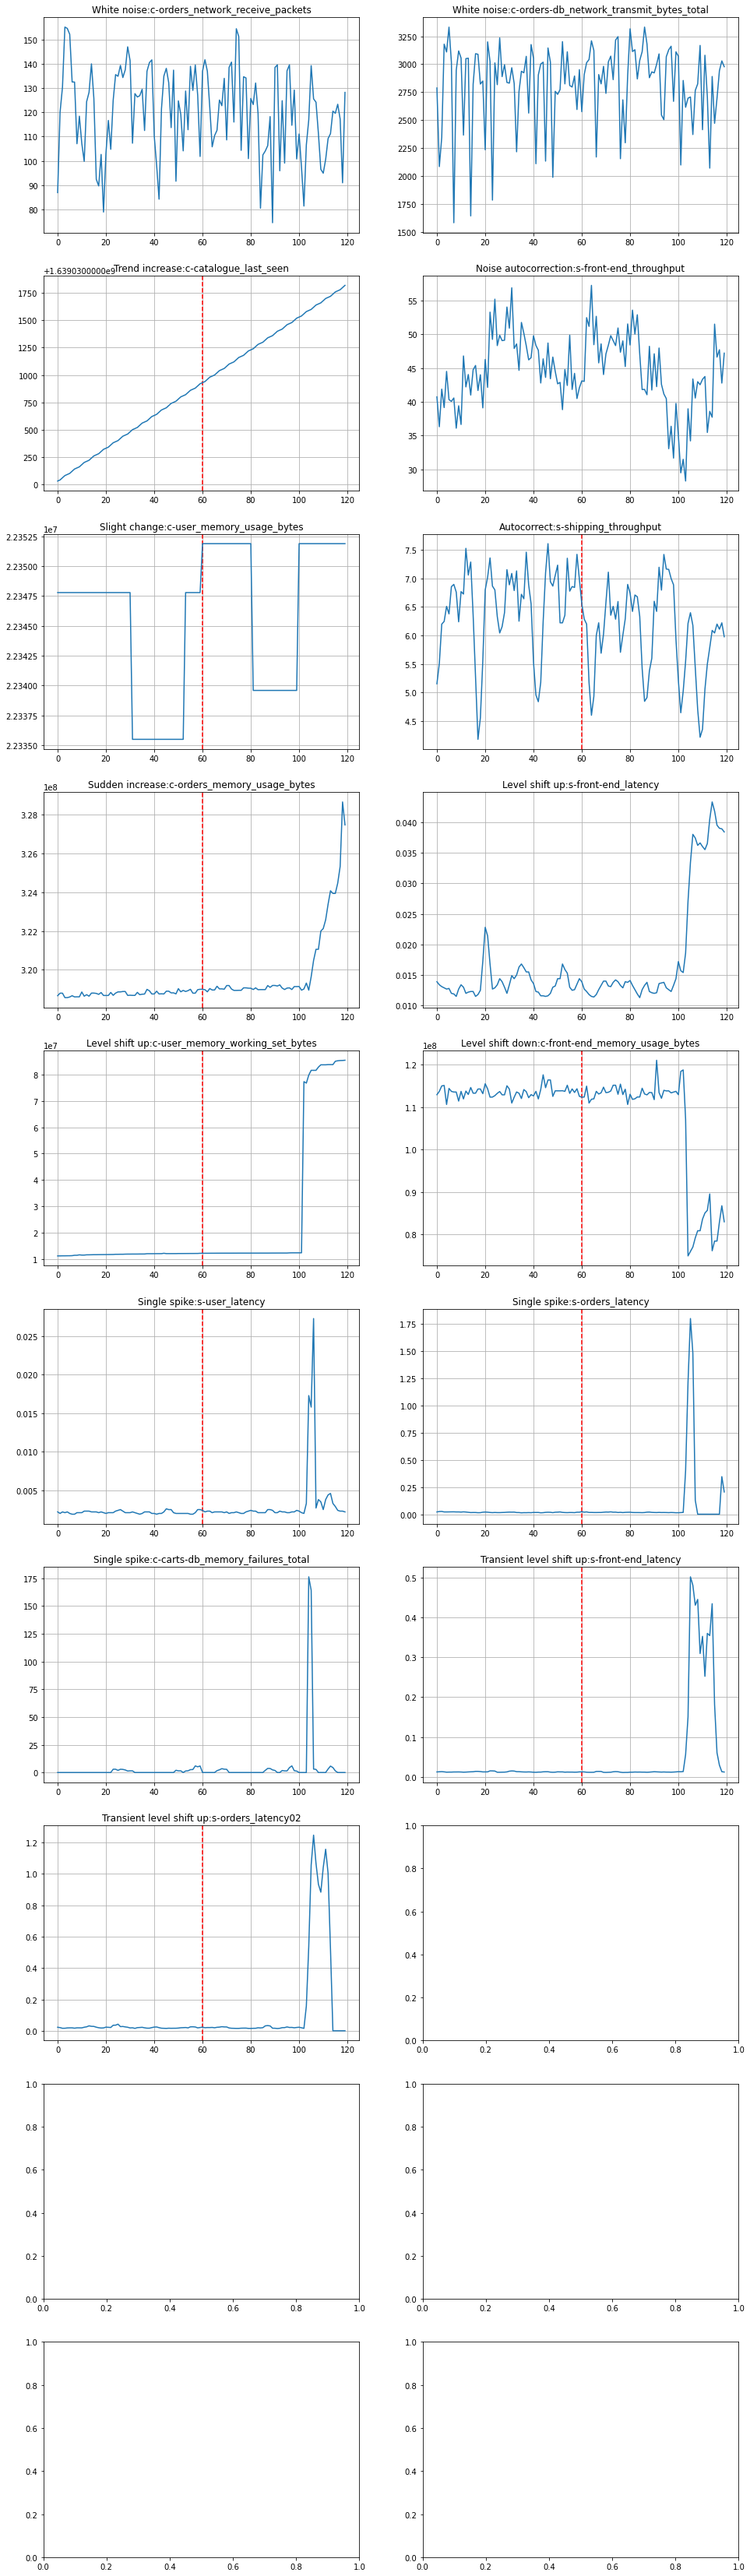

In [5]:
cases = sockshop.testcases_of_sockshop
fig, axs = plt.subplots(len(cases)//2, ncols=2)
fig.set_size_inches(16, 3*len(cases))
for case, ax in zip(cases, axs.flatten()):
    ts = np.array(case['datapoints'])
    train_ts, test_ts = np.split(ts, 2)

    pval = scipy.stats.epps_singleton_2samp(train_ts, test_ts)[1]
    if pval <= 0.05:
        ax.axvline(train_ts.size, color='red', linestyle='dashed', label='breaks')
    print(f"{pval:5f}", case['name'], case['name'])

    ax.set_title(f"{case['pattern']}:{case['name']}")
    ax.plot(ts)
    ax.grid()

## Chowtest

0.000000 c-orders_network_receive_packets White noise
0.000000 c-orders-db_network_transmit_bytes_total White noise
0.000000 c-catalogue_last_seen Trend increase
0.000000 s-front-end_throughput Noise autocorrection
0.000000 c-user_memory_usage_bytes Slight change
0.000000 s-shipping_throughput Autocorrect
0.000000 c-orders_memory_usage_bytes Sudden increase
0.000192 s-front-end_latency Level shift up
0.164672 c-user_memory_working_set_bytes Level shift up
0.000000 c-front-end_memory_usage_bytes Level shift down
0.176136 s-user_latency Single spike
0.354524 s-orders_latency Single spike
0.549633 c-carts-db_memory_failures_total Single spike
0.060228 s-front-end_latency Transient level shift up
0.089652 s-orders_latency02 Transient level shift up
0.962654 c-catalogue_cpu_cfs_throttled_periods_total Multiple spikes
0.000000 c-user_cpu_usage_seconds_total White noise -> Transient level shift down
0.000000 c-front-end_network_receive_packets_total White noise -> Transient level shift down
0

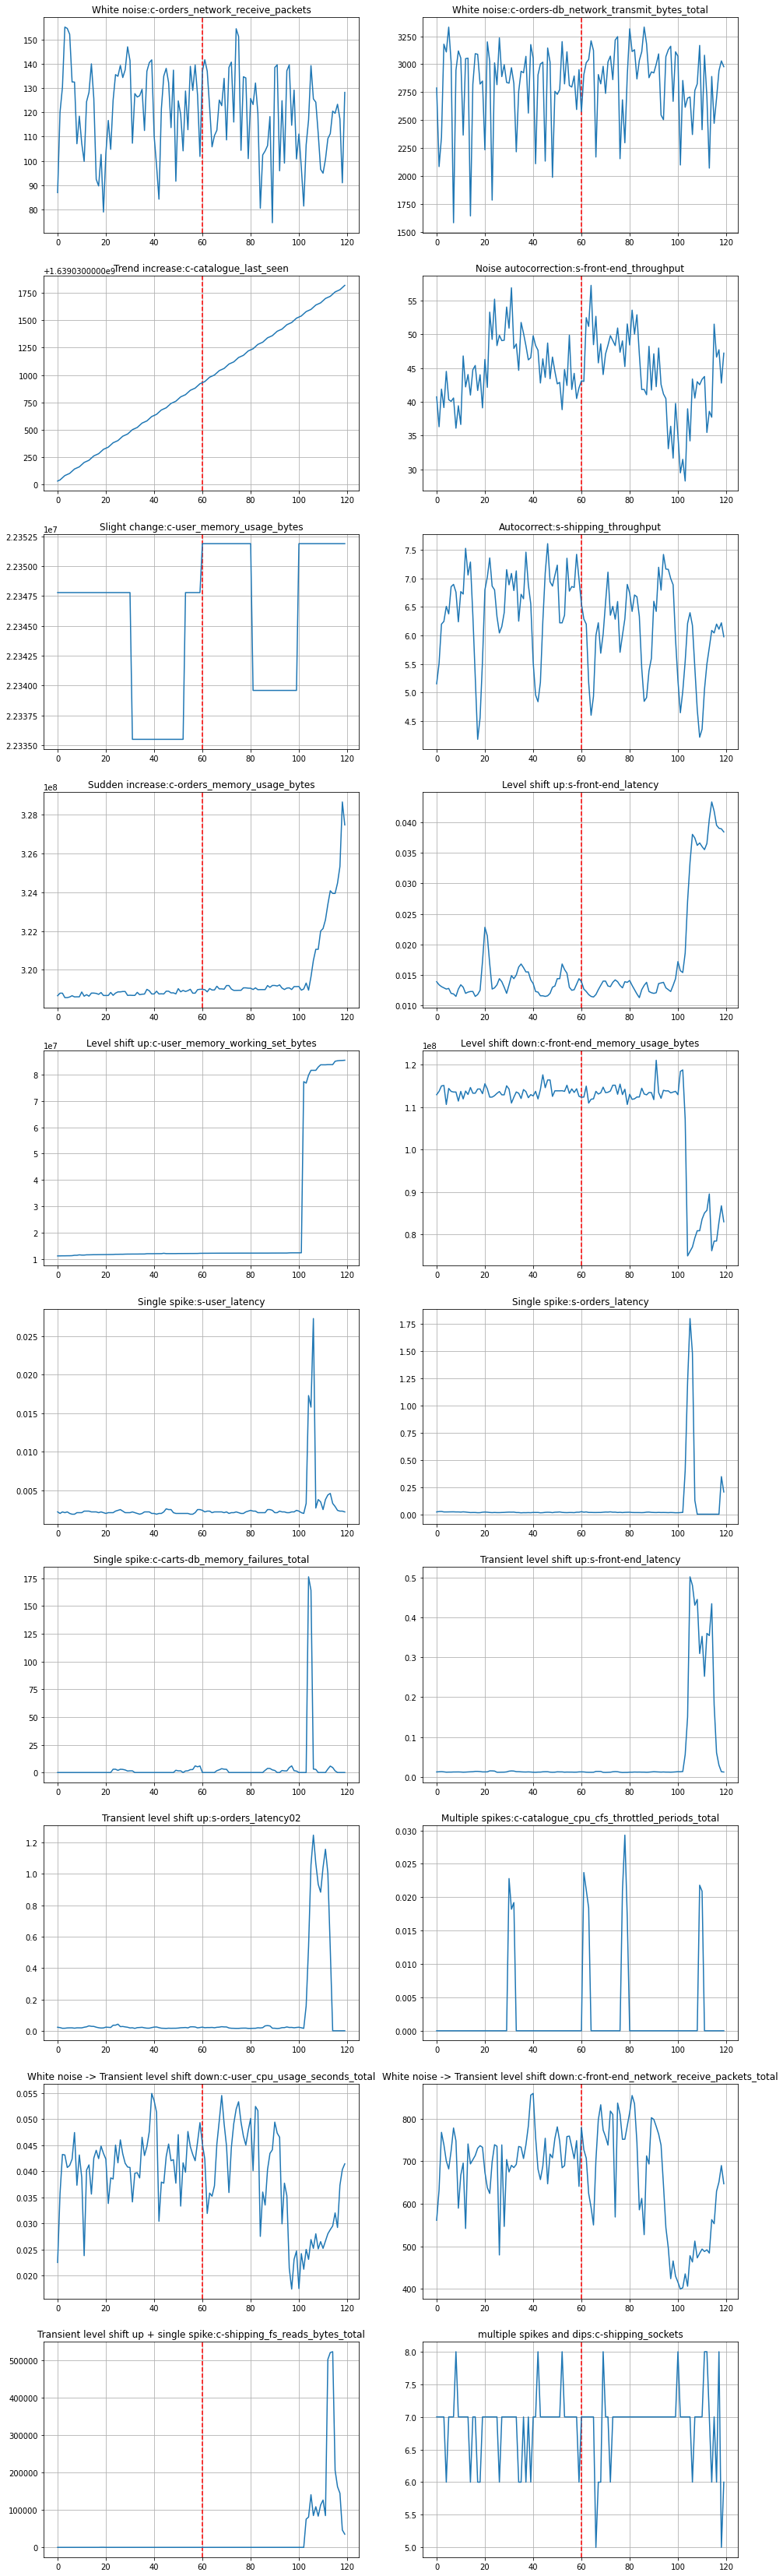

In [6]:
import statsmodels.api as sm
import scipy.stats

def chow_test(ts, breakpoint_idx):
    """
    Chow test for breakpoint detection.
    """
    x = np.arange(ts.size).reshape(-1, 1)
    model_com = sm.OLS(ts, x).fit()
    rss_com = model_com.ssr

    x1, x2 = x[:breakpoint_idx], x[breakpoint_idx:]
    y1, y2 = ts[:breakpoint_idx], ts[breakpoint_idx:]
    model1 = sm.OLS(y1, x1).fit()
    rss1 = model1.ssr
    model2 = sm.OLS(y2, x2).fit()
    rss2 = model2.ssr
    k = x.shape[1]

    chow_stat = ((rss_com - (rss1 + rss2)) / k) / ((rss1 + rss2) / (x1.size + x2.size - 2*k))
    p_value = float(1 - scipy.stats.f.cdf(chow_stat, dfn=k, dfd=((x1.size + x2.size) - 2 * k)))
    return chow_stat, p_value


cases = sockshop.testcases_of_sockshop
fig, axs = plt.subplots(len(cases)//2, ncols=2)
fig.set_size_inches(16, 3*len(cases))
for case, ax in zip(cases, axs.flatten()):
    ts = np.array(case['datapoints'])
    pval = chow_test(ts, ts.size//2)[1]
    if pval <= 0.05:
        ax.axvline(ts.size//2, color='red', linestyle='dashed', label='breaks')
    print(f"{pval:5f}", case['name'], case['pattern'])

    ax.set_title(f"{case['pattern']}:{case['name']}")
    ax.plot(ts)
    ax.grid()


## AR-based liklihood ratio

In [7]:
from tsdr.outlierdetection.ar import AROutlierDetector

def likelihood_ratio_test_with_ar(ts, ax):
    ar = AROutlierDetector(ts)
    ar.fit(regression='c', ic='bic')
    sse = ar.sse_in_sample()
    ax.plot(ar.predict_in_sample()[0])

    train_ts, test_ts = np.split(ts, 2) 

    train_ar = AROutlierDetector(train_ts)
    train_ar.fit(regression='c', ic='bic')
    train_sse = train_ar.sse_in_sample()
    ax.plot(train_ar.predict_in_sample()[0])

    test_ar = AROutlierDetector(test_ts)
    test_ar.fit(regression='c', ic='bic')
    test_sse = test_ar.sse_in_sample()
    ax.plot(test_ar.predict_in_sample()[0])

    criteria = (sse - (train_sse + test_sse)) / (ts.size - train_ts.size)
    return criteria


-117.454012 c-orders_network_receive_packets
-50909.411770 c-orders-db_network_transmit_bytes_total
5.053329 c-catalogue_last_seen
2.643601 s-front-end_throughput
-67216.634841 c-user_memory_usage_bytes
0.047151 s-shipping_throughput
-3048728003.274707 c-orders_memory_usage_bytes
-0.000000 s-front-end_latency
-940538786614.595581 c-user_memory_working_set_bytes
-1773299368536.713379 c-front-end_memory_usage_bytes
0.000001 s-user_latency
-0.000530 s-orders_latency
24.037059 c-carts-db_memory_failures_total
0.002048 s-front-end_latency
-0.000411 s-orders_latency02
-0.000000 c-catalogue_cpu_cfs_throttled_periods_total
-0.000005 c-user_cpu_usage_seconds_total
-2539.659140 c-front-end_network_receive_packets_total
165401662.033254 c-shipping_fs_reads_bytes_total
0.013392 c-shipping_sockets


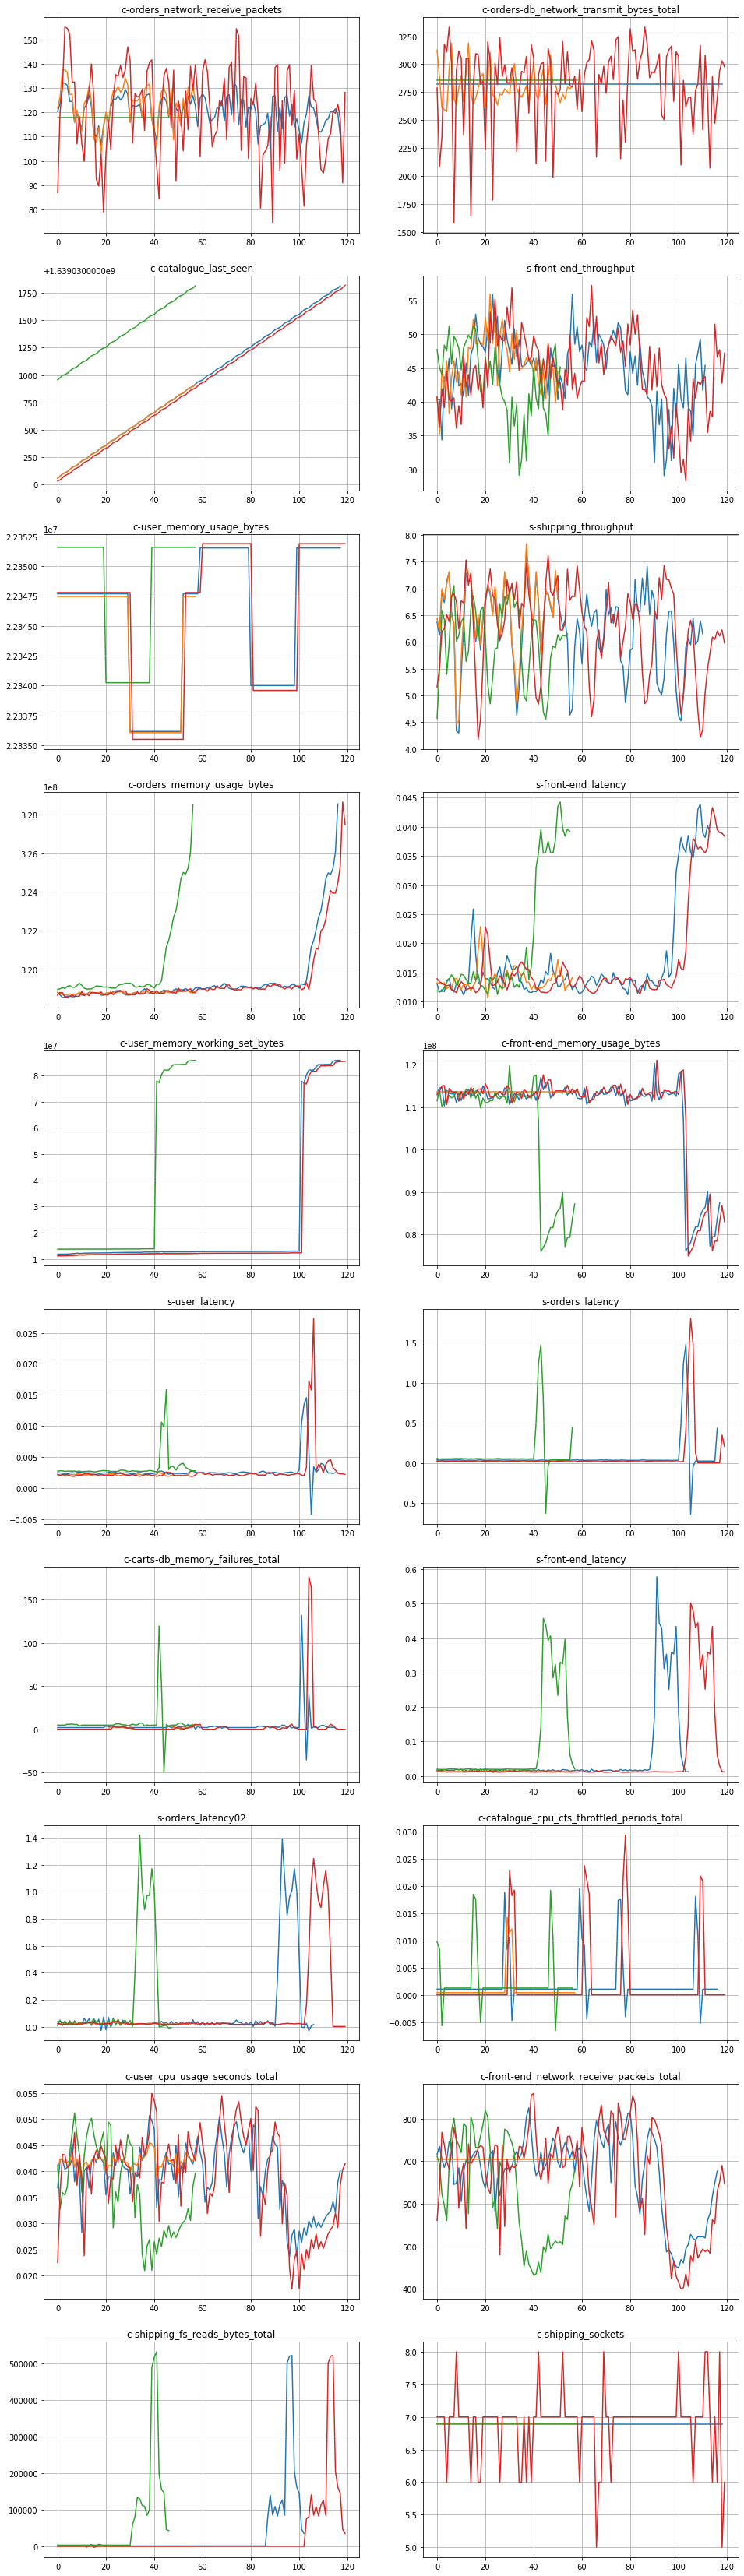

In [8]:
cases = sockshop.testcases_of_sockshop
fig, axs = plt.subplots(len(cases)//2, ncols=2)
fig.set_size_inches(16, 3*len(cases))
for case, ax in zip(cases, axs.flatten()):
    ts = np.array(case['datapoints'])
    criteria = likelihood_ratio_test_with_ar(ts, ax)
    print(f"{criteria:5f}", case['name'])

    ax.set_title(case['name'])
    ax.plot(ts)
    ax.grid()


## 3-sigma + zscore

In [9]:
def sigma3_zscore(ts: np.ndarray, sigma=3):
    zscores = scipy.stats.zscore(ts)
    mean = np.mean(zscores)
    std = np.std(zscores)
    outliers = []
    for i, z in enumerate(zscores):
        if abs(z - mean) > sigma * std:
            outliers.append((i, z))
    return outliers

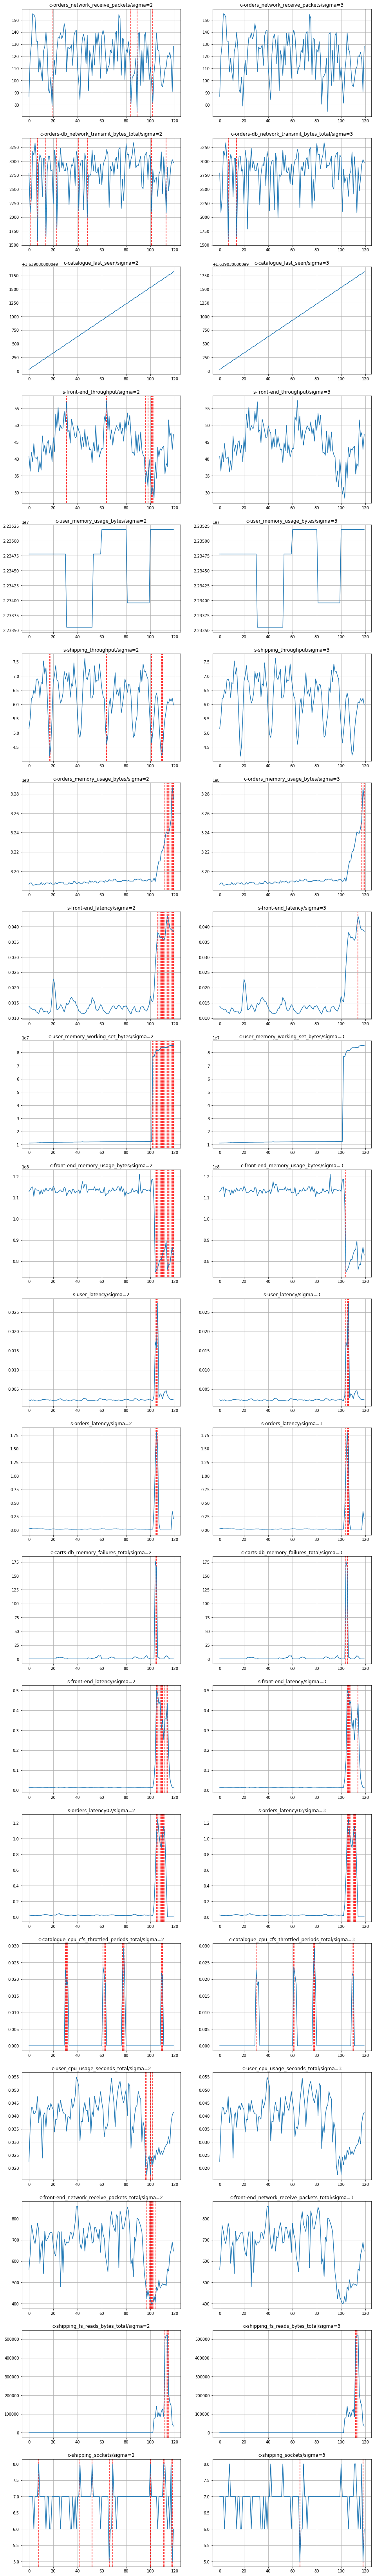

In [10]:
cases = sockshop.testcases_of_sockshop
fig, axses = plt.subplots(len(cases), ncols=2)
fig.set_size_inches(16, 6*len(cases))
for case, axs in zip(cases, axses):
    for ax, sigma in zip(axs, [2, 3]):
        ts = np.array(case['datapoints'])
        outliers = sigma3_zscore(ts, sigma=sigma)
        if len(outliers) > 0:
            for outlier in outliers:
                ax.axvline(outlier[0], color='red', linestyle='dashed', label='breaks')

        ax.set_title(case['name'] + '/sigma=' + str(sigma))
        ax.plot(ts)
        ax.grid()

## Z-score + 3 sigma rule + K-S test

In [ ]:
cases = sockshop.testcases_of_sockshop
fig, axs = plt.subplots(len(cases)//2, ncols=2)
fig.set_size_inches(16, 3*len(cases))
for case, ax in zip(cases, axs.flatten()):
    ts = np.array(case['datapoints'])

    ax.plot(ts)
    ax.grid()

    sigma3_outliers = sigma3_zscore(ts, sigma=3)
    if len(sigma3_outliers) > 0:
        ax.set_title(case['name'] + '/anomaly with sigma=3')
        continue

    sigma2_outliers = sigma3_zscore(ts, sigma=2)

    train_ts, test_ts = np.split(ts, 2)
    pval = scipy.stats.ks_2samp(train_ts, test_ts).pvalue
    print(f"{pval:5f}", case['name'])
    if pval <= 0.05:
        ax.axvline(train_ts.size, color='red', linestyle='dashed', label='breaks')
        ax.set_title(case['name'] + '/anomaly with ks-test')
    else:
        ax.set_title(case['name'])

In [ ]:
cases = sockshop.testcases_of_sockshop
fig, axs = plt.subplots(len(cases)//2, ncols=2)
fig.set_size_inches(16, 3*len(cases))
for case, ax in zip(cases, axs.flatten()):
    ts = np.array(case['datapoints'])

    ax.plot(ts)
    ax.grid()

    sigma3_outliers = sigma3_zscore(ts, sigma=3)
    if len(sigma3_outliers) > 0:
        ax.set_title(f"{case['pattern']}:{case['name']}/anomaly with sigma=3")
        for idx, _ in sigma3_outliers:
            ax.axvline(idx, color='orange', linestyle='dashed', label='breaks')
        continue

    sigma2_outliers = sigma3_zscore(ts, sigma=2)
    if len(sigma2_outliers) == 0:
        ax.set_title(f"{case['pattern']}:{case['name']}/no anomaly with sigma=2")
        continue
    pvals = {}
    for idx, _ in sigma2_outliers:
        train_ts, test_ts = np.split(ts, indices_or_sections=[idx])
        # pvals[idx] = scipy.stats.ks_2samp(train_ts, test_ts).pvalue
        pvals[idx] = scipy.stats.anderson_ksamp([train_ts, test_ts])[2]
        for idx, _ in sigma2_outliers:
            ax.axvline(idx, color='green', linestyle='dashed', label='breaks')

    min_pval_idx = min(pvals, key=pvals.get)
    min_pval = pvals[min_pval_idx]
    if min_pval <= 0.01:
        print(min_pval, case['name'])
        ax.axvline(min_pval_idx, color='red', linestyle='dashed', label='breaks')
        ax.set_title(f"{case['pattern']}:{case['name']}/anomaly with ks-test")
    else:
        ax.set_title(f"{case['pattern']}:{case['name']}/no anomaly with ks-test")

# Robust z-score + 3sigma

In [4]:
from sklearn.preprocessing import robust_scale

def robust_zscore_3sigma_rule(ts: np.ndarray, sigma=3):
    zscores = robust_scale(ts)
    mean = np.mean(zscores)
    std = np.std(zscores)
    outliers = []
    for i, z in enumerate(zscores):
        if abs(z - mean) > sigma * std:
            outliers.append((i, z))
    return outliers

In [1]:
cases = sockshop.testcases_of_sockshop
fig, axses = plt.subplots(len(cases), ncols=2)
fig.set_size_inches(16, 4*len(cases))
for case, axs in zip(cases, axses):
    for ax, sigma in zip(axs, [3, 4]):
        ts = np.array(case['datapoints'])
        # ts = tsdr.smooth_with_ma(np.array(case['datapoints']))
        outliers = robust_zscore_3sigma_rule(ts, sigma=sigma)
        if len(outliers) > 0:
            for outlier in outliers:
                ax.axvline(outlier[0], color='red', linestyle='dashed', label='breaks')

        ax.set_title(case['name'] + '/sigma=' + str(sigma))
        ax.plot(ts)
        ax.grid()

NameError: name 'sockshop' is not defined